# Autoscaling Axis

The limits on an axis can be set manually (e.g. ``ax.set_xlim(xmin, xmax)``)
or Matplotlib can set them automatically based on the data already on the Axes.
There are a number of options to this autoscaling behaviour, discussed below.

We will start with a simple line plot showing that autoscaling
extends the axis limits 5% beyond the data limits (-2π, 2π).



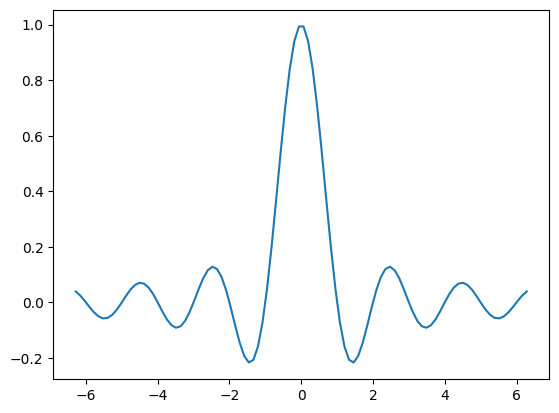

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sinc(x)

fig, ax = plt.subplots()
ax.plot(x, y)

## Margins

The default margin around the data limits is 5%, which is based on the default configuration setting of `rcParams["axes.xmargin"]` (default: 0.05), `rcParams["axes.ymargin"]` (default: 0.05), and `rcParams["axes.zmargin"]` (default: 0.05):

In [2]:
print(ax.margins())

(0.05, 0.05)


The margin size can be overridden to make them smaller or larger using
`margins`:



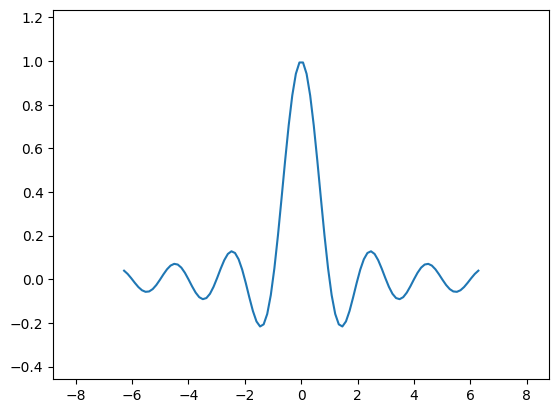

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2)

In general, margins can be in the range (-0.5, ∞), where negative margins set
the axes limits to a subrange of the data range, i.e. they clip data.
Using a single number for margins affects both axes, a single margin can be
customized using keyword arguments ``x`` or ``y``, but positional and keyword
interface cannot be combined.



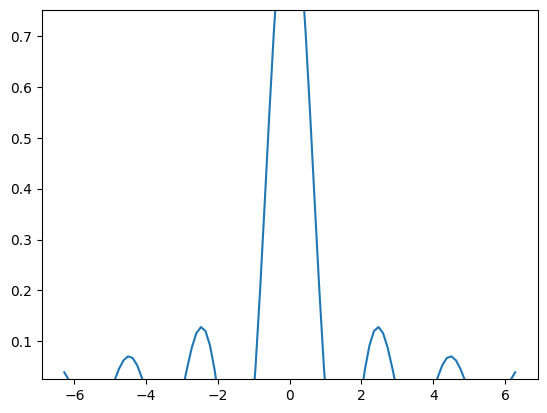

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(y=-0.2)

## Sticky edges

There are plot elements (`Artist`'s) that are usually used without margins.
For example false-color images (e.g. created with `Axes.imshow`) are not
considered in the margins calculation.


Text(0.5, 1.0, 'margins(0.2)')

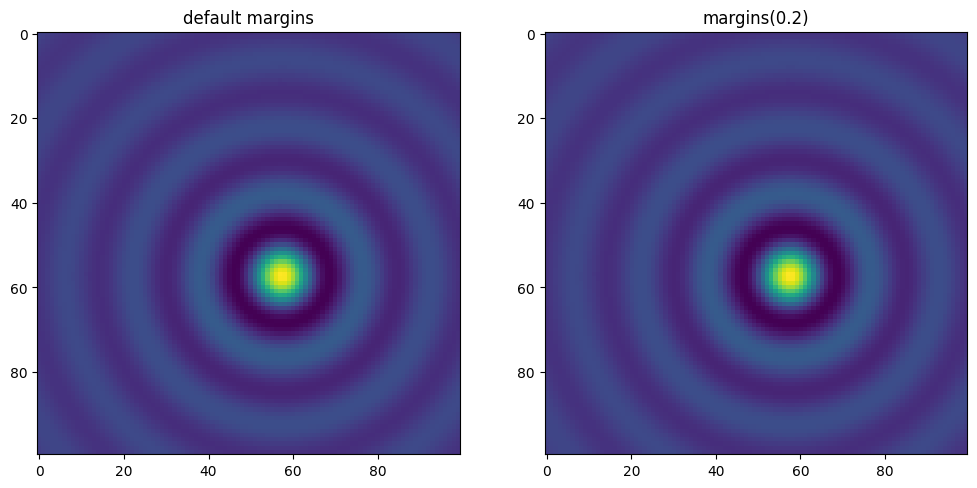

In [5]:
xx, yy = np.meshgrid(x, x)
zz = np.sinc(np.sqrt((xx - 1)**2 + (yy - 1)**2))

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(zz)
ax[0].set_title("default margins")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].set_title("margins(0.2)")

This override of margins is determined by "sticky edges", a
property of `Artist` class that can suppress adding margins to axis
limits. The effect of sticky edges can be disabled on an Axes by changing
`use_sticky_edges`.
Artists have a property `Artist.sticky_edges`, and the values of
sticky edges can be changed by writing to ``Artist.sticky_edges.x`` or
``Artist.sticky_edges.y``.

The following example shows how overriding works and when it is needed.



Text(0.5, 1.0, 'default use_sticky_edges\nmargins(-0.2)')

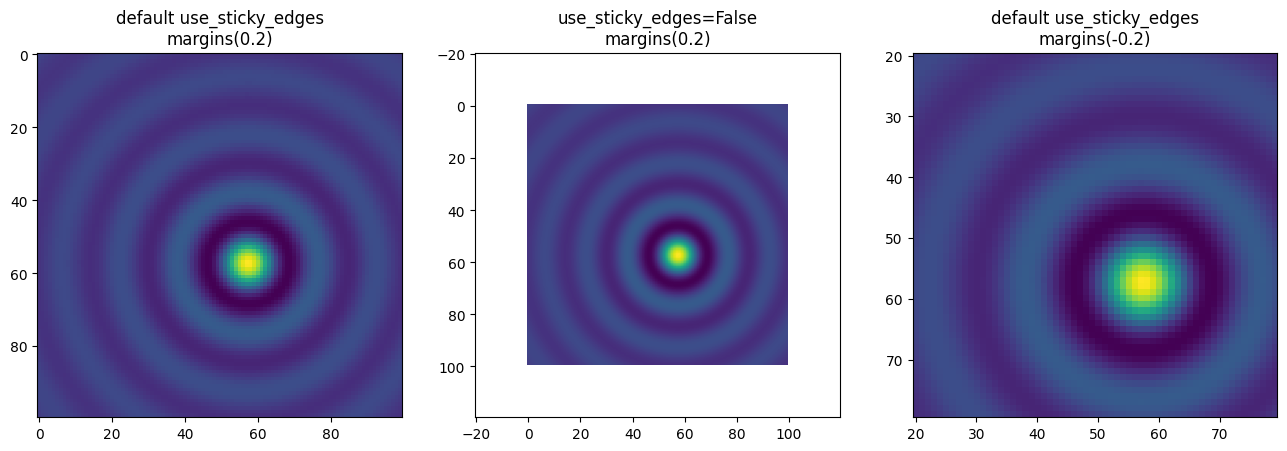

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 10))
ax[0].imshow(zz)
ax[0].margins(0.2)
ax[0].set_title("default use_sticky_edges\nmargins(0.2)")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].use_sticky_edges = False
ax[1].set_title("use_sticky_edges=False\nmargins(0.2)")
ax[2].imshow(zz)
ax[2].margins(-0.2)
ax[2].set_title("default use_sticky_edges\nmargins(-0.2)")

We can see that setting ``use_sticky_edges`` to *False* renders the image
with requested margins.

While sticky edges don't increase the axis limits through extra margins,
negative margins are still taken into account. This can be seen in
the reduced limits of the third image.

## Controlling autoscale

By default, the limits are
recalculated every time you add a new curve to the plot:


Text(0.5, 1.0, 'Two curves')

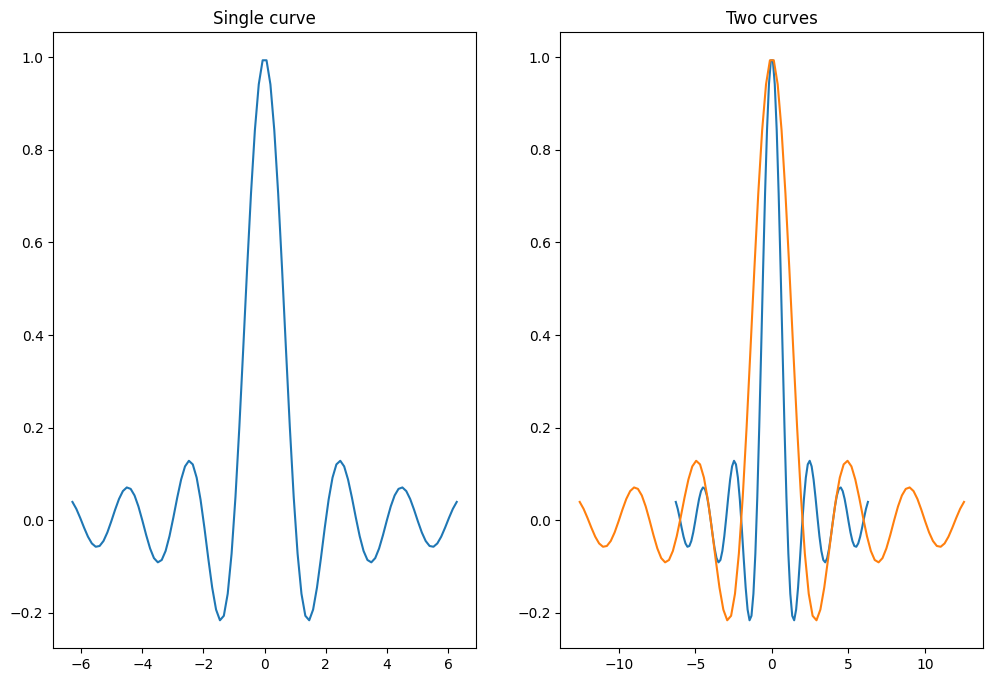

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_title("Single curve")
ax[1].plot(x, y)
ax[1].plot(x * 2.0, y)
ax[1].set_title("Two curves")

However, there are cases when you don't want to automatically adjust the
viewport to new data.

One way to disable autoscaling is to manually set the
axis limit. Let's say that we want to see only a part of the data in
greater detail. Setting the ``xlim`` persists even if we add more curves to
the data. To recalculate the new limits  calling `Axes.autoscale` will
toggle the functionality manually.



Text(0.5, 1.0, 'set_xlim(left=-1, right=1)\nautoscale()')

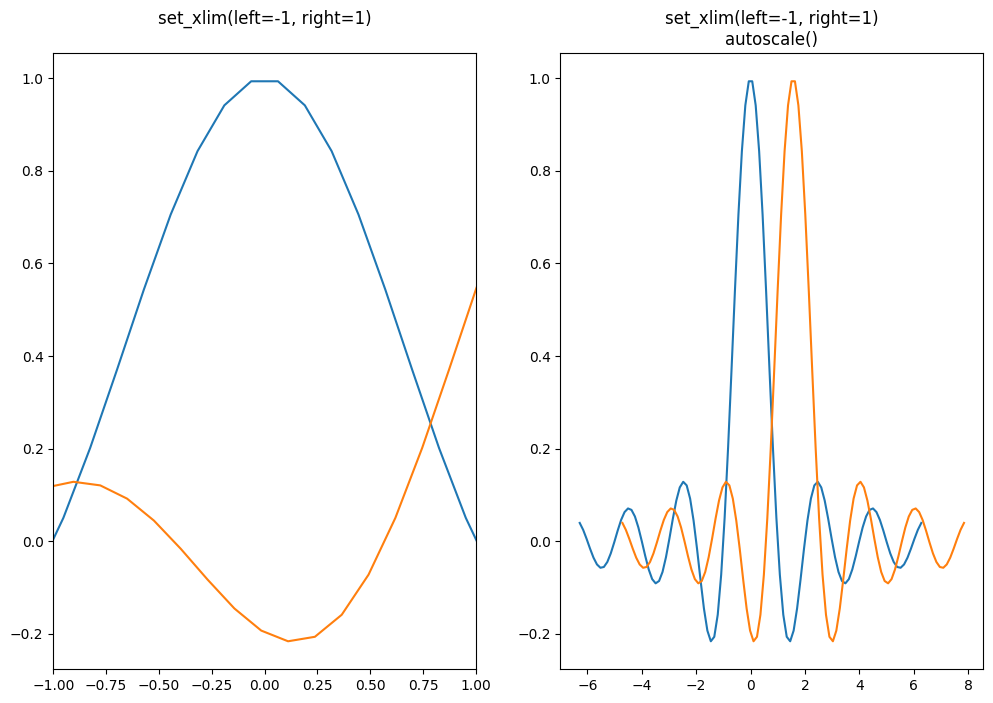

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_xlim(left=-1, right=1)
ax[0].plot(x + np.pi * 0.5, y)
ax[0].set_title("set_xlim(left=-1, right=1)\n")
ax[1].plot(x, y)
ax[1].set_xlim(left=-1, right=1)
ax[1].plot(x + np.pi * 0.5, y)
ax[1].autoscale()
ax[1].set_title("set_xlim(left=-1, right=1)\nautoscale()")

We can check that the first plot has autoscale disabled and that the second
plot has it enabled again by using `Axes.get_autoscale_on()`:



In [ ]:
print(ax[0].get_autoscale_on())  # False means disabled
print(ax[1].get_autoscale_on())  # True means enabled -> recalculated

Arguments of the autoscale function give us precise control over the process
of autoscaling. A combination of arguments ``enable``, and ``axis`` sets the
autoscaling feature for the selected axis (or both). The argument ``tight``
sets the margin of the selected axis to zero. To preserve settings of either
``enable`` or ``tight`` you can set the opposite one to *None*, that way
it should not be modified. However, setting ``enable`` to *None* and tight
to *True* affects both axes regardless of the ``axis`` argument.



(0, 0)


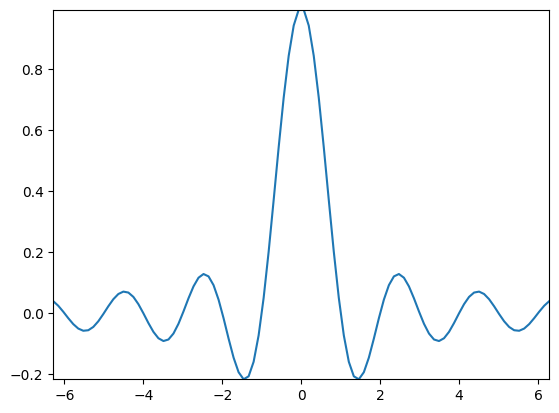

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2)
ax.autoscale(enable=None, axis="x", tight=True)

print(ax.margins())

## Working with collections

Autoscale works out of the box for all lines, patches, and images added to
the Axes. One of the artists that it won't work with is a `Collection`.
After adding a collection to the Axes, one has to manually trigger the
`autoscale_view()` to recalculate
axes limits.

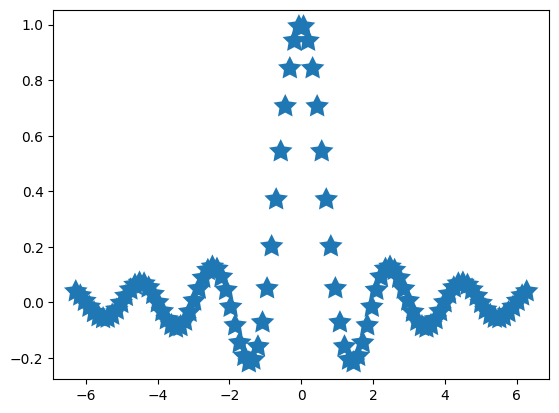

In [11]:
fig, ax = plt.subplots()
collection = mpl.collections.StarPolygonCollection(
    5, rotation=0, sizes=(250,),  # five point star, zero angle, size 250px
    offsets=np.column_stack([x, y]),  # Set the positions
    offset_transform=ax.transData,  # Propagate transformations of the Axes
)
ax.add_collection(collection)
ax.autoscale_view()